## Grover's Algorithm - Example for $n = 2$


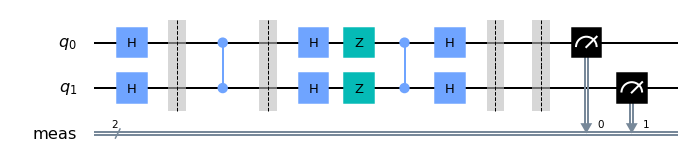

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram


n = 2
grover_circuit = QuantumCircuit(n)

# State Prepation
grover_circuit.h(0)
grover_circuit.h(1)

grover_circuit.barrier()

# Oracle
grover_circuit.cz(0,1) 

grover_circuit.barrier()

# Amplitude amplification (only one step)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])

grover_circuit.measure_all()

grover_circuit.draw('mpl')

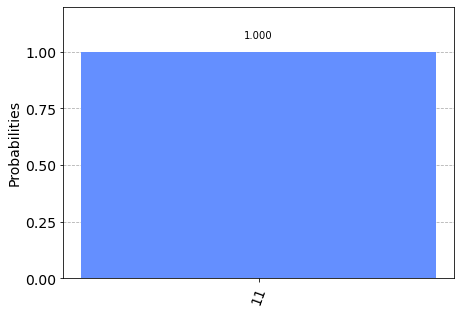

In [2]:
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 8092
results = execute(grover_circuit, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [3]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

C:\Users\anton\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Running on current least busy device:  ibmq_quito


In [4]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend=device, shots=1024, optimization_level=1)
job_monitor(job, interval = 2)

Job Status: job has successfully run


In [5]:
# Get the results from the computation
results = job.result()
results

In [6]:
answer = results.get_counts(grover_circuit)

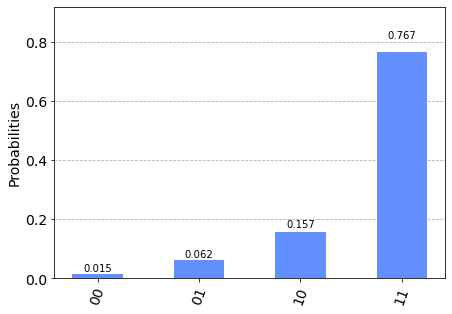

In [7]:
plot_histogram(answer)